
# Capstone Project 2 - Loan Default



## Exploratory Data Analysis


In this notebook I will explore the dataset created in the previous notebook using statistical graphics and visualizations to get a better understanding of the data and identify outliers and missing/incorrect data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from dateutil.relativedelta import relativedelta
from datetime import datetime

from library.sb_utils import save_file

### Loading the data

loading the data from wrangling step.

In [2]:
loan_data = pd.read_csv('../data/loan_data.csv')

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date_of_Birth                        233154 non-null  object 
 9   Employment_Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [4]:
loan_data.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date_of_Birth                           15433
Employment_Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS_SCORE                         573
PERFORM_CNS_SCORE_DESCRIPTION              20
PRI_NO_OF_ACCTS                   

In [5]:
len(loan_data['UniqueID'].unique())

233154

In [6]:
loan_data['UniqueID'].describe()

count    233154.000000
mean     535917.573376
std       68315.693711
min      417428.000000
25%      476786.250000
50%      535978.500000
75%      595039.750000
max      671084.000000
Name: UniqueID, dtype: float64

### Removing UniqueID

This field is just a unique identifier.

In [7]:
loan_data = loan_data.drop(['UniqueID'], axis=1)

In [8]:
loan_data.isna().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS               

#### Employment_type

This is the only field with null values, rather that drop the data or guess as to employment type I will just fill blanks with 'unknown'

In [9]:
loan_data['Employment_Type']=loan_data['Employment_Type'].fillna('unknown')

<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

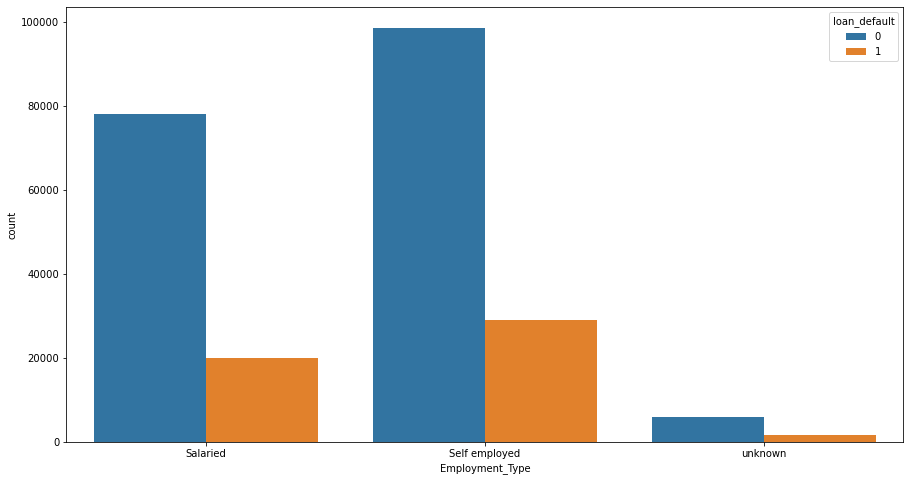

In [10]:
plt.figure(figsize = (15,8))

sns.countplot(x="Employment_Type", hue="loan_default", data=loan_data)

In [11]:
loan_data['disbursed_amount'].describe()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

In [12]:
loan_data['disbursed_amount'].value_counts()

48349     2140
53303     2125
51303     1992
50303     1960
55259     1887
          ... 
35881        1
37930        1
134265       1
107660       1
47319        1
Name: disbursed_amount, Length: 24565, dtype: int64

In [13]:
len(loan_data['disbursed_amount'].unique())

24565

<AxesSubplot:xlabel='disbursed_amount', ylabel='Count'>

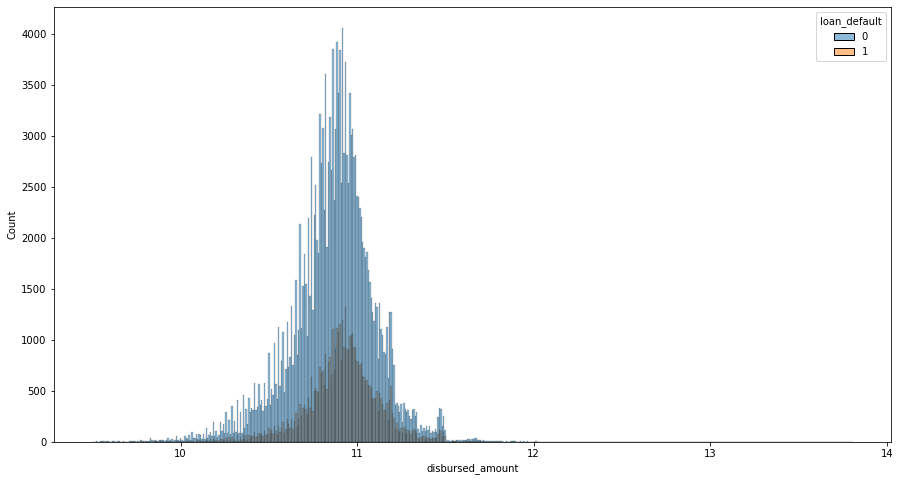

In [14]:
plt.figure(figsize = (15,8))
#sns.histplot(loan_data, x="disbursed_amount", hue="loan_default")
sns.histplot(loan_data, x=np.log(loan_data['disbursed_amount']), hue="loan_default")

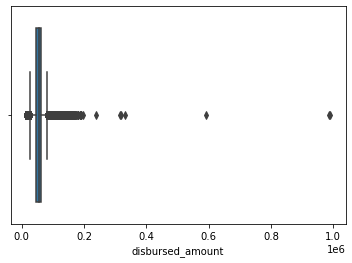

In [15]:
#sns.boxplot( x=loan_data["disbursed_amount"], y=loan_data["loan_default"]);
sns.boxplot( x=loan_data["disbursed_amount"]);
plt.show()

<AxesSubplot:xlabel='disbursed_amount_100', ylabel='Count'>

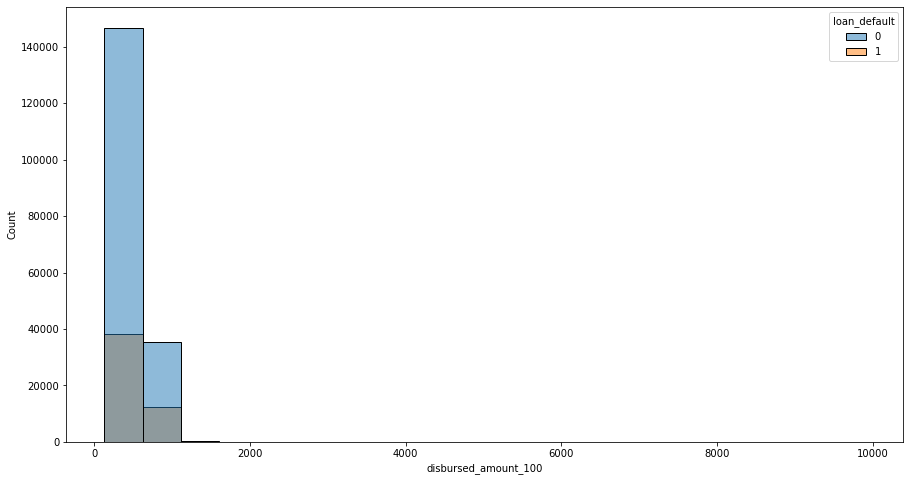

In [16]:
plt.figure(figsize = (15,8))
loan_data['disbursed_amount_100'] = loan_data['disbursed_amount'] / 100

loan_data['disbursed_amount_100'].describe()
sns.histplot(loan_data, x="disbursed_amount_100", hue="loan_default",bins = 20)



In [17]:
loan_data = loan_data.drop(['disbursed_amount_100'], axis=1)

In [18]:
loan_data['PERFORM_CNS_SCORE'].value_counts()

0      116950
300      8776
738      8662
825      7393
15       3765
        ...  
884         1
837         1
863         1
838         1
822         1
Name: PERFORM_CNS_SCORE, Length: 573, dtype: int64

In [19]:
len(loan_data['PERFORM_CNS_SCORE'].unique())

573

In [20]:
loan_data['PERFORM_CNS_SCORE'].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS_SCORE, dtype: float64

<AxesSubplot:xlabel='PERFORM_CNS_SCORE', ylabel='Count'>

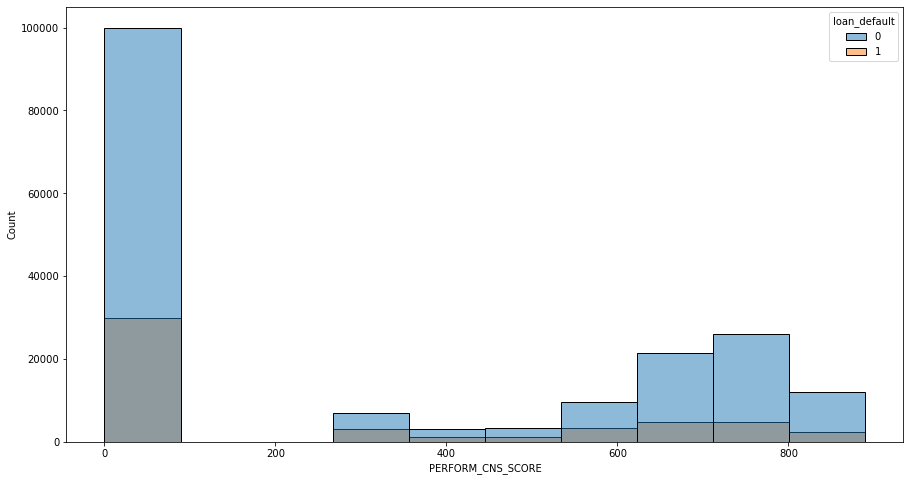

In [21]:
plt.figure(figsize = (15,8))
sns.histplot(loan_data, x="PERFORM_CNS_SCORE",bins=10, hue="loan_default")

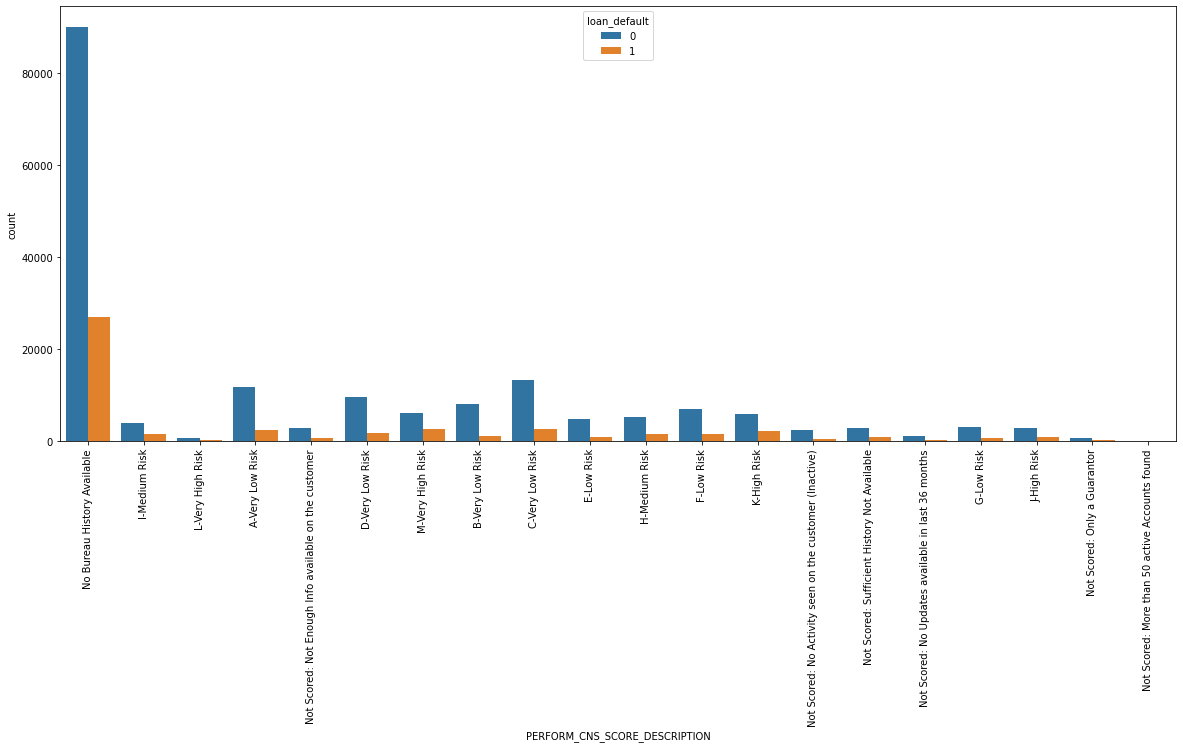

In [22]:
plt.figure(figsize = (20,8))

_ = sns.countplot(x="PERFORM_CNS_SCORE_DESCRIPTION", hue="loan_default", data=loan_data)
_ = plt.xticks(rotation=90)

In [23]:
loan_data['branch_id'].describe()

count    233154.000000
mean         72.936094
std          69.834995
min           1.000000
25%          14.000000
50%          61.000000
75%         130.000000
max         261.000000
Name: branch_id, dtype: float64

In [24]:
len(loan_data['branch_id'].unique())

82

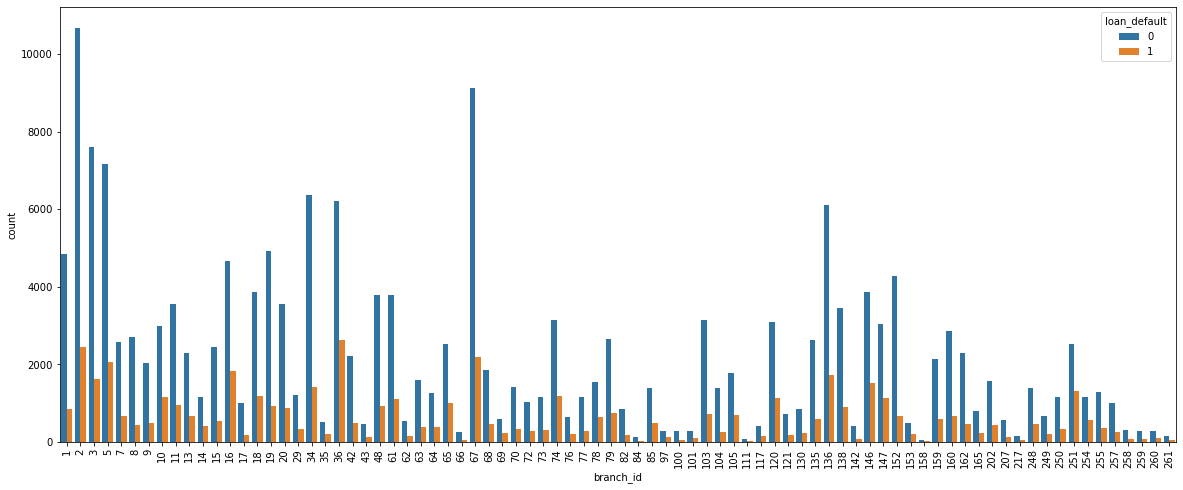

In [25]:
plt.figure(figsize = (20,8))

#sns.histplot(loan_data, x="branch_id", hue="loan_default",bins = 82)
_ = sns.countplot(x="branch_id", hue="loan_default", data=loan_data)
_ = plt.xticks(rotation=90)

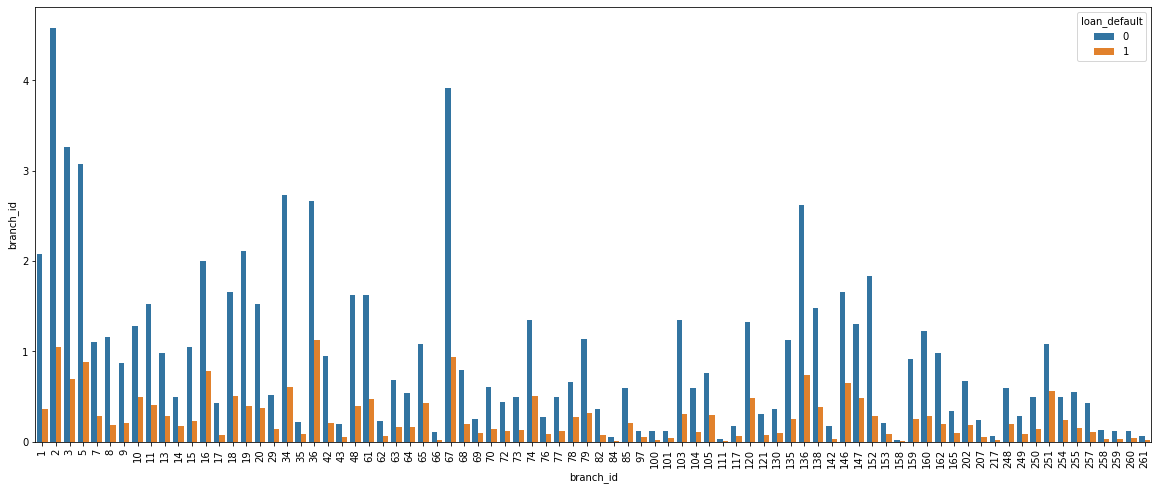

In [26]:
plt.figure(figsize = (20,8))

#sns.histplot(loan_data, x="branch_id", hue="loan_default",bins = 82)
#_ = sns.barplot(x="branch_id",y="branch_id", hue="loan_default", data=loan_data)
#_ = plt.xticks(rotation=90)

_ = sns.barplot(x='branch_id', y='branch_id', data=loan_data, estimator=lambda x: len(x) / len(loan_data) * 100, hue='loan_default')
_ = plt.ylabel="Percent"
_ = plt.xticks(rotation=90)

In [27]:
loan_data['supplier_id'].describe()

count    233154.000000
mean      19638.635035
std        3491.949566
min       10524.000000
25%       16535.000000
50%       20333.000000
75%       23000.000000
max       24803.000000
Name: supplier_id, dtype: float64

In [28]:
len(loan_data['supplier_id'].unique())

2953

In [29]:
loan_data['manufacturer_id'].describe()
#len(loan_data['manufacturer_id'].unique())

count    233154.000000
mean         69.028054
std          22.141304
min          45.000000
25%          48.000000
50%          86.000000
75%          86.000000
max         156.000000
Name: manufacturer_id, dtype: float64

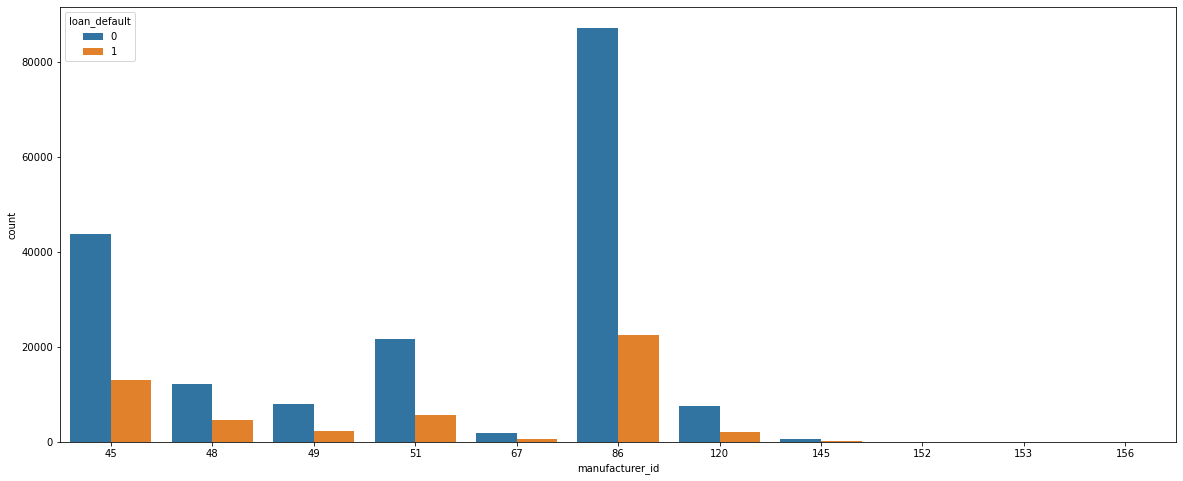

In [30]:
plt.figure(figsize = (20,8))

_ = sns.countplot(x="manufacturer_id", hue="loan_default", data=loan_data)


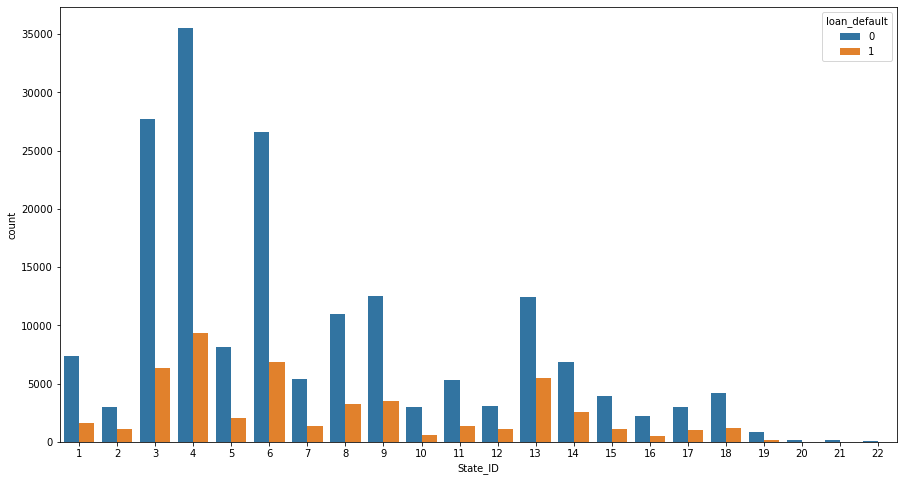

In [31]:
plt.figure(figsize = (15,8))

_ = sns.countplot(x="State_ID", hue="loan_default", data=loan_data)

In [32]:
loan_data['Employee_code_ID'].describe()

count    233154.000000
mean       1549.477148
std         975.261278
min           1.000000
25%         713.000000
50%        1451.000000
75%        2362.000000
max        3795.000000
Name: Employee_code_ID, dtype: float64

### MobileNo_Avl_Flag

This field is all value '1' so dropping

In [33]:
loan_data['MobileNo_Avl_Flag'].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [34]:
loan_data = loan_data.drop(['MobileNo_Avl_Flag'], axis=1)

In [35]:
loan_data['Aadhar_flag'].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

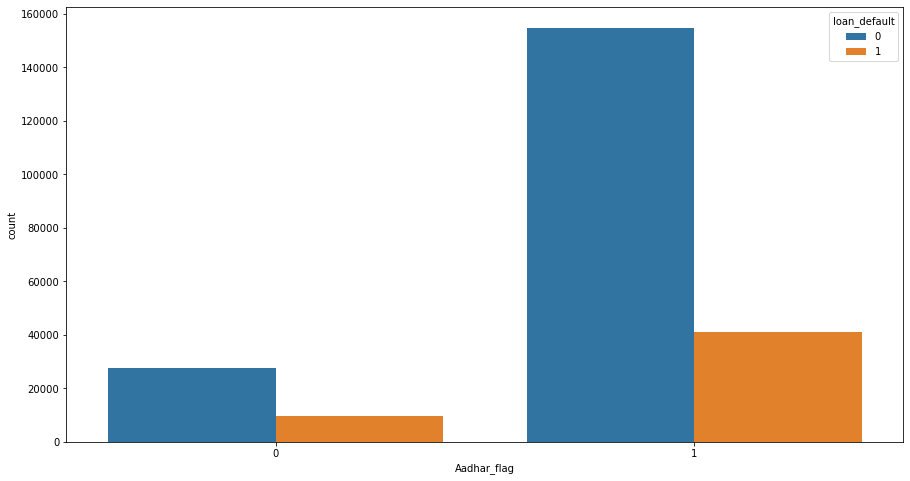

In [36]:
plt.figure(figsize = (15,8))

_ = sns.countplot(x="Aadhar_flag", hue="loan_default", data=loan_data)

In [37]:
loan_data['PAN_flag'].value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

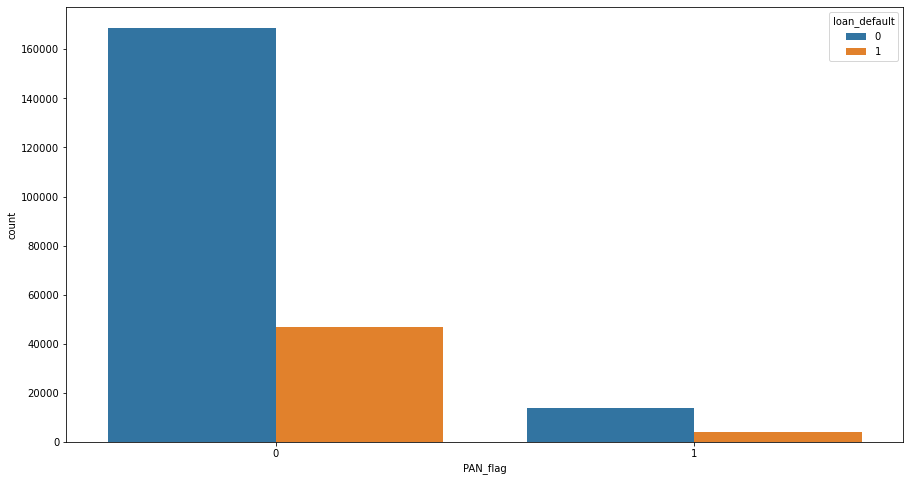

In [38]:
plt.figure(figsize = (15,8))

_ = sns.countplot(x="PAN_flag", hue="loan_default", data=loan_data)

In [39]:
loan_data['VoterID_flag'].value_counts()

0    199360
1     33794
Name: VoterID_flag, dtype: int64

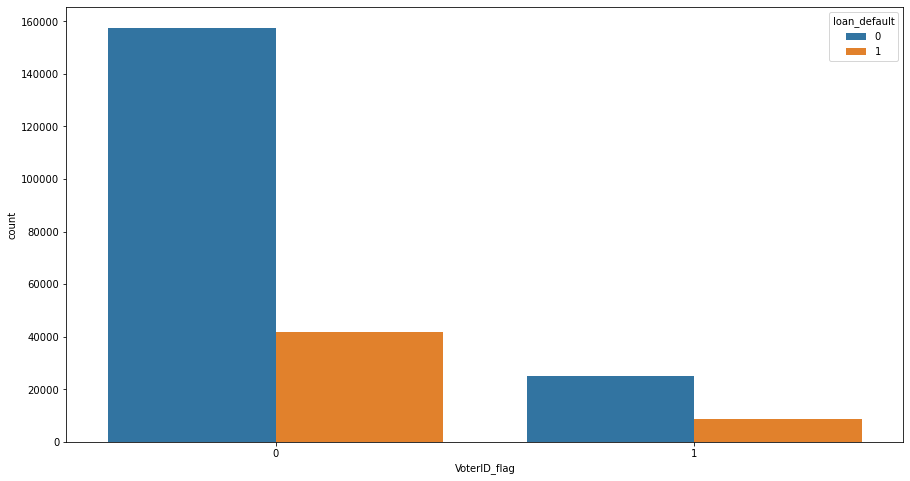

In [40]:
plt.figure(figsize = (15,8))

_ = sns.countplot(x="VoterID_flag", hue="loan_default", data=loan_data)

In [41]:
loan_data['Driving_flag'].value_counts()

0    227735
1      5419
Name: Driving_flag, dtype: int64

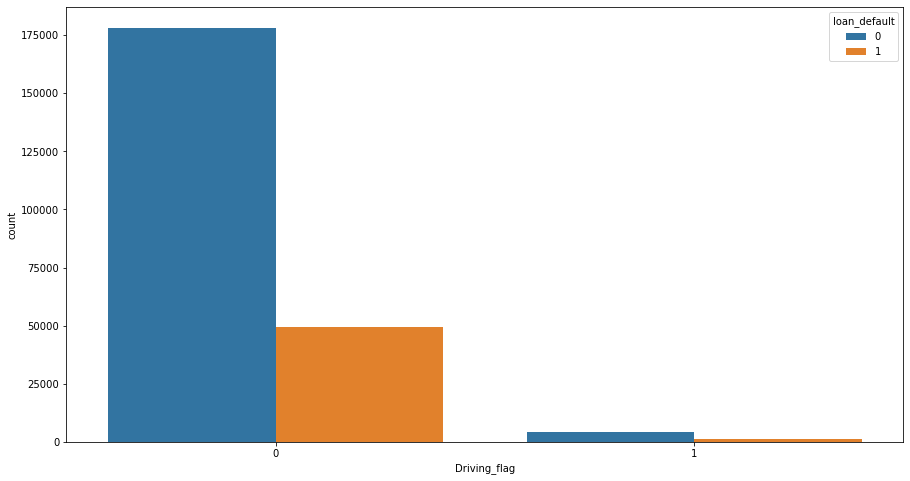

In [42]:
plt.figure(figsize = (15,8))

_ = sns.countplot(x="Driving_flag", hue="loan_default", data=loan_data)

In [43]:
loan_data['Passport_flag'].value_counts()

0    232658
1       496
Name: Passport_flag, dtype: int64

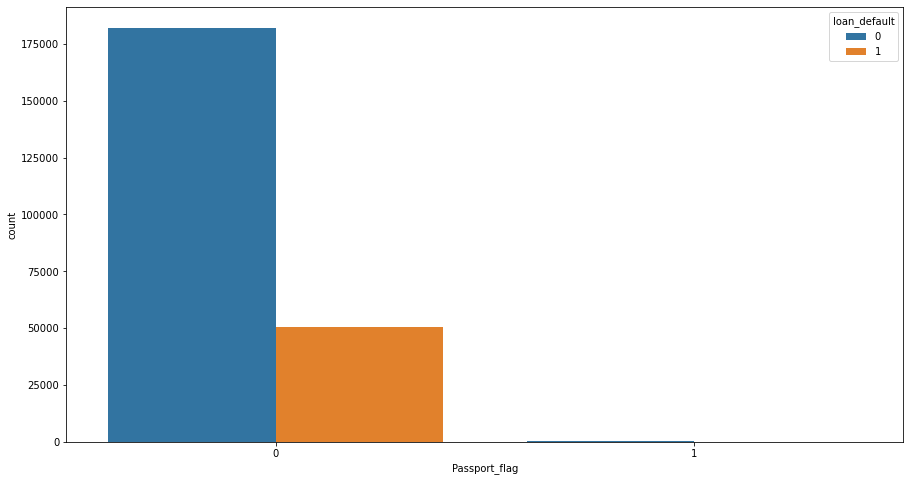

In [44]:
plt.figure(figsize = (15,8))

_ = sns.countplot(x="Passport_flag", hue="loan_default", data=loan_data)

<Figure size 1440x576 with 0 Axes>

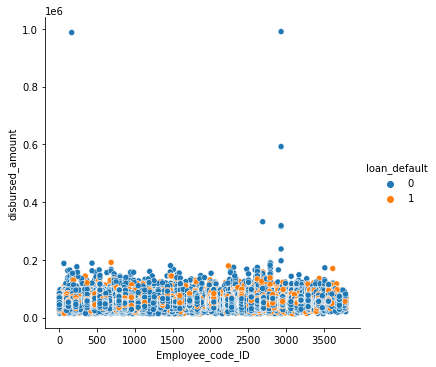

In [45]:
plt.figure(figsize = (20,8))
#sns.histplot(loan_data, x="Employee_code_ID",bins=50, hue="loan_default")
#sns.countplot(x="Employee_code_ID", hue="loan_default", data=loan_data)
sns.relplot(x="Employee_code_ID", y='disbursed_amount', hue="loan_default", data=loan_data);

In [46]:
loan_data['AVERAGE_ACCT_AGE_MONTHS'].value_counts()

0      119373
6        6028
7        5366
11       5237
10       5143
        ...  
167         1
292         1
227         1
158         1
192         1
Name: AVERAGE_ACCT_AGE_MONTHS, Length: 192, dtype: int64

<AxesSubplot:xlabel='AVERAGE_ACCT_AGE_MONTHS', ylabel='Count'>

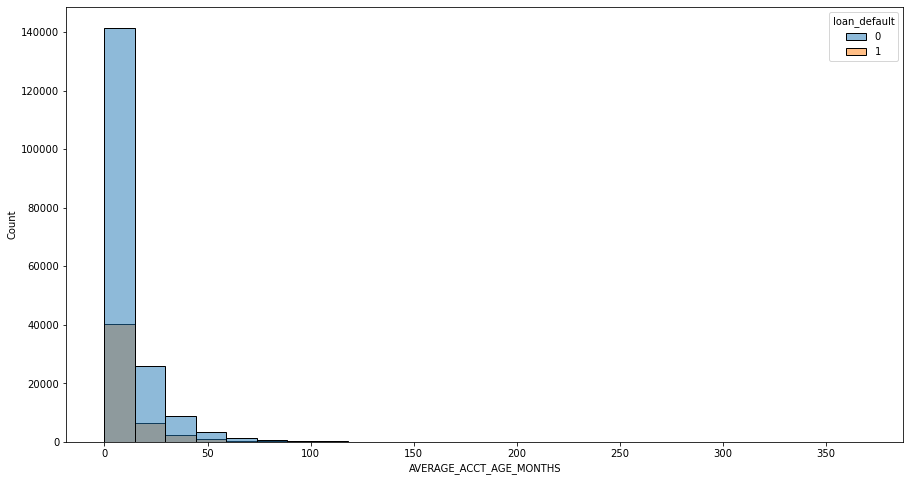

In [47]:
plt.figure(figsize = (15,8))

sns.histplot(loan_data, x="AVERAGE_ACCT_AGE_MONTHS", hue="loan_default",bins = 25)

In [48]:
loan_data['CREDIT_HISTORY_LENGTH_MONTHS'].value_counts()

0      119127
6        4761
25       4745
7        4017
24       3833
        ...  
279         1
240         1
369         1
277         1
220         1
Name: CREDIT_HISTORY_LENGTH_MONTHS, Length: 294, dtype: int64

<AxesSubplot:xlabel='CREDIT_HISTORY_LENGTH_MONTHS', ylabel='Count'>

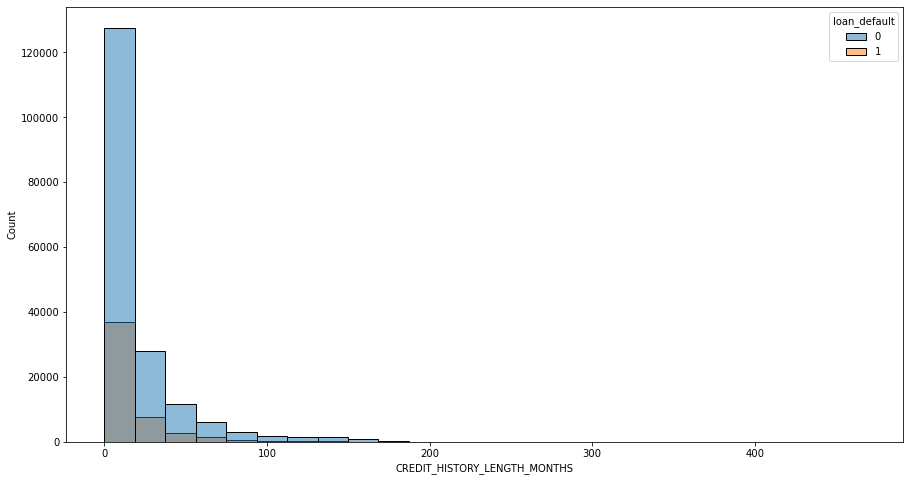

In [49]:
plt.figure(figsize = (15,8))

sns.histplot(loan_data, x="CREDIT_HISTORY_LENGTH_MONTHS", hue="loan_default",bins = 25)

In [50]:
loan_data['age_of_cust'].describe()

count    233154.000000
mean         33.903579
std           9.828921
min          17.000000
25%          26.000000
50%          32.000000
75%          41.000000
max          69.000000
Name: age_of_cust, dtype: float64

<AxesSubplot:xlabel='age_of_cust', ylabel='Count'>

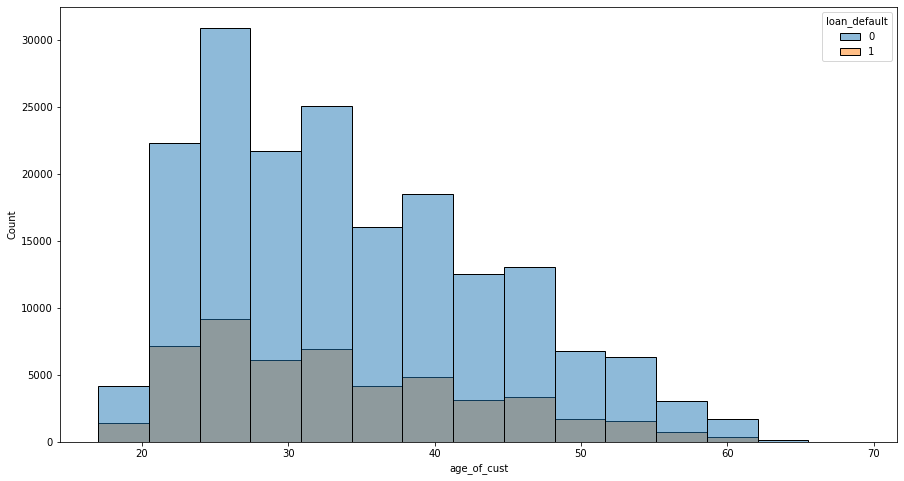

In [51]:
plt.figure(figsize = (15,8))

sns.histplot(loan_data, x="age_of_cust", hue="loan_default",bins = 15)

In [52]:
loan_data['DisbursalDate_month'] = pd.DatetimeIndex(loan_data['DisbursalDate_date']).month

In [53]:
print(loan_data['DisbursalDate_month'].value_counts())


10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DisbursalDate_month, dtype: int64


<AxesSubplot:xlabel='DisbursalDate_month', ylabel='Count'>

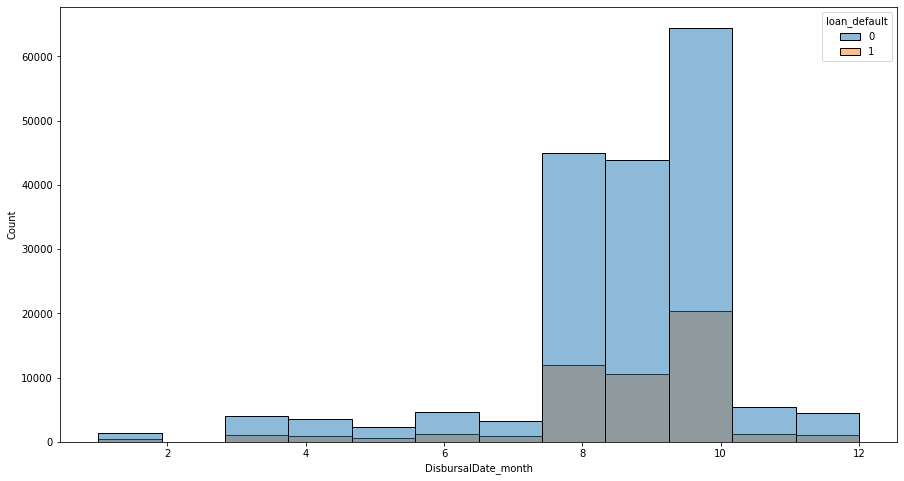

In [54]:
plt.figure(figsize = (15,8))
sns.histplot(loan_data, x="DisbursalDate_month", hue="loan_default",bins = 12)

In [55]:
loan_data = loan_data.drop(['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH','Date_of_Birth','DisbursalDate'], axis=1)

In [56]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     233154 non-null  int64  
 1   asset_cost                           233154 non-null  int64  
 2   ltv                                  233154 non-null  float64
 3   branch_id                            233154 non-null  int64  
 4   supplier_id                          233154 non-null  int64  
 5   manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_ID                   233154 non-null  int64  
 7   Employment_Type                      233154 non-null  object 
 8   State_ID                             233154 non-null  int64  
 9   Employee_code_ID                     233154 non-null  int64  
 10  Aadhar_flag                          233154 non-null  int64  
 11  PAN_flag     

Text(0.5, 1.0, 'Heat Map')

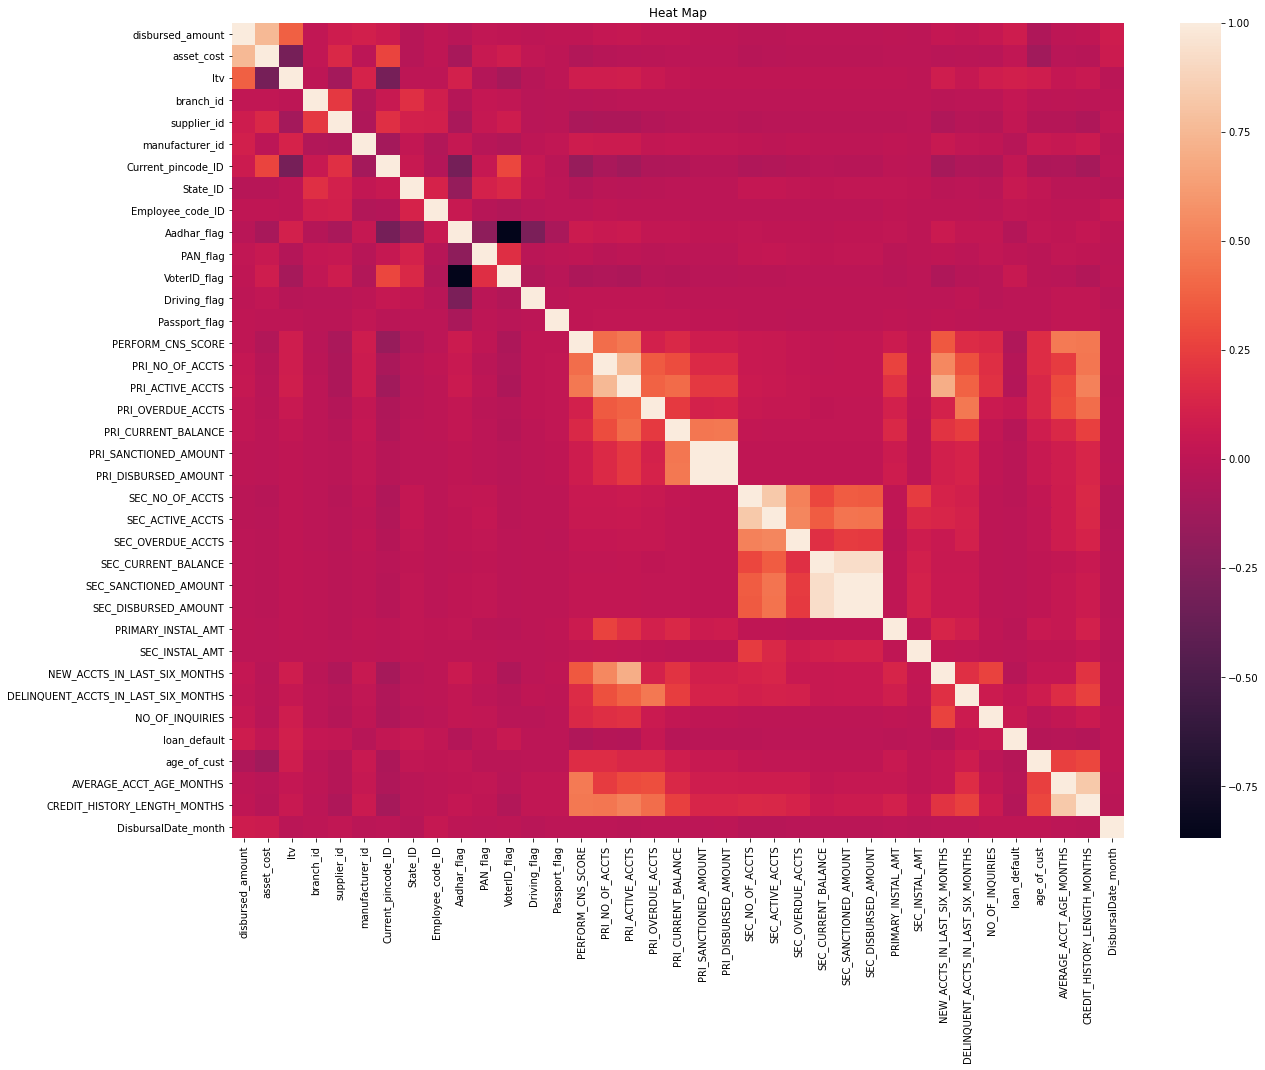

In [57]:
plt.figure(figsize = (20,15))
sns.heatmap(loan_data.corr())
plt.title('Heat Map')